In [ ]:
!pip install impyute

In [ ]:
!pip install datawig

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 7.1MB 6.8MB/s 
     |████████████████████████████████| 10.4MB 40.5MB/s 
     |████████████████████████████████| 29.6MB 130kB/s 
  Created wheel for datawig: filename=datawig-0.2.0-cp36-none-any.whl size=72676 sha256=99c593e1d62122d90b0ec78ac27adb6b6338e12b6863788500e75a109f2dd29e
  Stored in directory: /root/.cache/pip/wheels/85/07/ea/bd5addfefc4f04ba78700db67d77e59148c30b1be4ac34c157
Successfully built datawig
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.18.5 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successf

###Missing Completely at Random (MCAR)
A variable is missing completely at random if the probability of missingness is the same for all units, for example, if each survey respondent decides whether to answer a certain question by rolling a a die and refusing to answer if a “6” shows up. If data are missing completely at random, then throwing out cases with missing data does not bias your inferences.

A graph showing a random dispersion:

![img_scatterplot[1].png](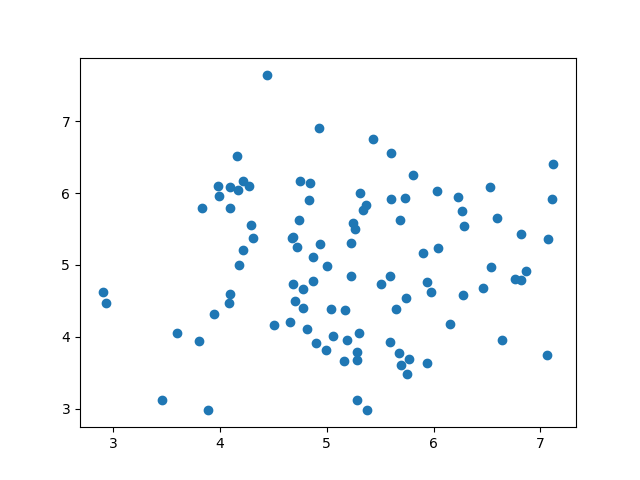)

###Missing At Random (MAR)
Missing at Random means the propensity (an inclination or natural tendency to behave in a particular way) for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
###Not Missing at Random (NMAR) 
The probability of being missing varies for reasons that are unknown to us, i.e it depends on unobserved predictors. 
###Missingness that depends on the missing value itself
Suppose that people with higher earnings are less likely to reveal them. In the extreme case (for example, all persons earning more than $100,000 refuse to respond), this is called censoring, but even the probabilistic case causes difficulty.

#Different ways for data Imputation

1- Do Nothing:

That’s an easy one. You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false). However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.


2- Imputation Using (Mean/Median) Values:

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.
![WXQGJuQ[1].png](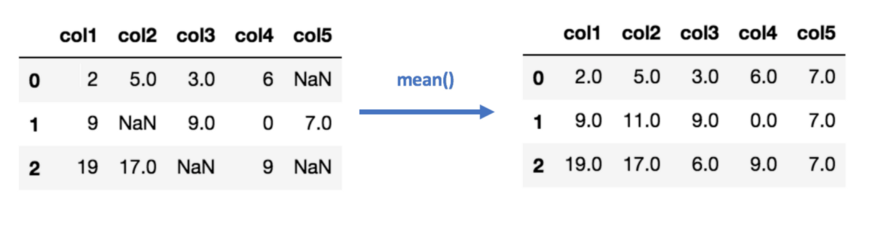)


Pros:

    Easy and fast.
    Works well with small numerical datasets.

Cons:

    Doesn’t factor the correlations between features. It only works on the column level.
    Will give poor results on encoded categorical features.
    Not very accurate.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from math import sqrt
import random
import numpy as np
import pandas as pd

In [ ]:
random.seed(0)

#Fetching the dataset
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])
train.head()

20640
20640


,0,1,2,3,4,5,6,7,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Impute the values using scikit-learn SimpleImpute Class
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)
test_df = pd.DataFrame(imputed_train_df)
test_df.head()

,0,1,2,3,4,5,6,7,8
0,3.87794,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.30140,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.87794,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.64310,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.87794,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


3- Imputation Using (Most Frequent) or (Zero/Constant) Values:
Most Frequent is another statistical strategy to impute missing values and YES!! It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

Pros:

    Works well with categorical features.

Cons:

    It also doesn’t factor the correlations between features.
    It can introduce bias in the data.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


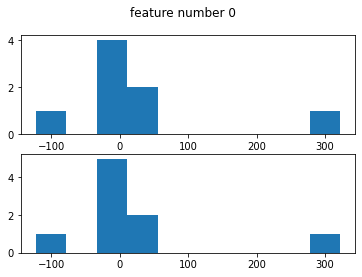

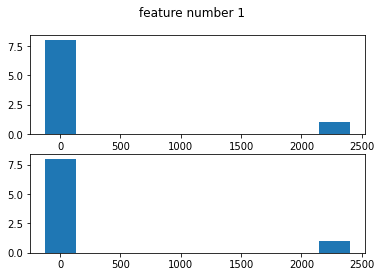

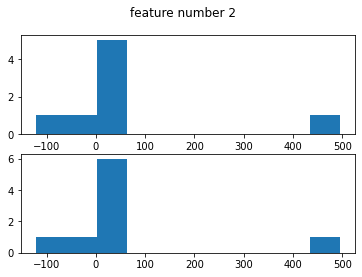

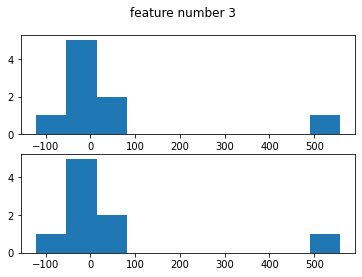

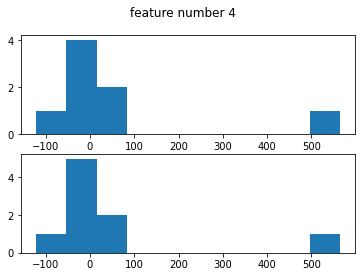

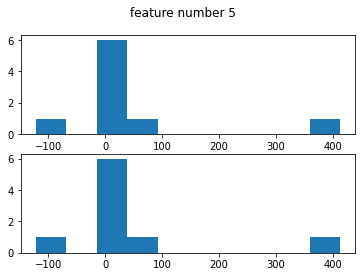

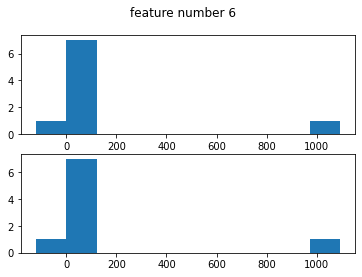

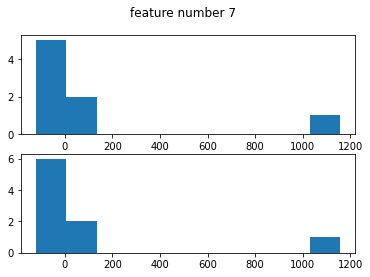

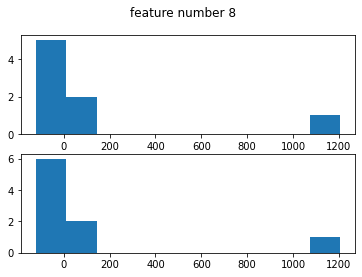

In [ ]:
#Impute the values using scikit-learn SimpleImpute Class

imp_mean = SimpleImputer( strategy='most_frequent') # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)
test_df = pd.DataFrame(imputed_train_df)



for i in range(train.shape[1]):
  fig, axs = plt.subplots(2)
  fig.suptitle('feature number '+ str(i))
  axs[0].hist(train.iloc[i])
  axs[1].hist(test_df.iloc[i])
  plt.show()

Zero or Constant imputation — as the name suggests — it replaces the missing values with either zero or any constant value you specify
![h6GQDOy[1].png](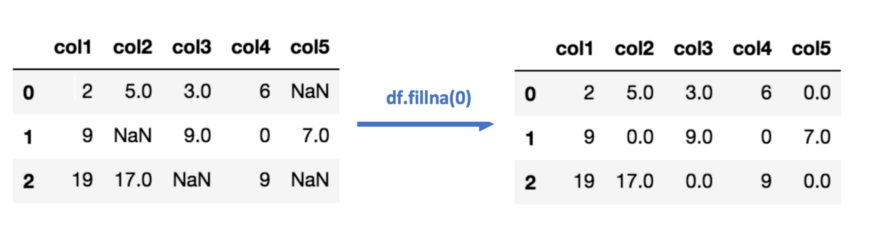)

4- Imputation Using k-NN:

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. Let’s see some example code using Impyute library which provides a simple and easy way to use KNN for imputation:

In [ ]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

![knn[1].png](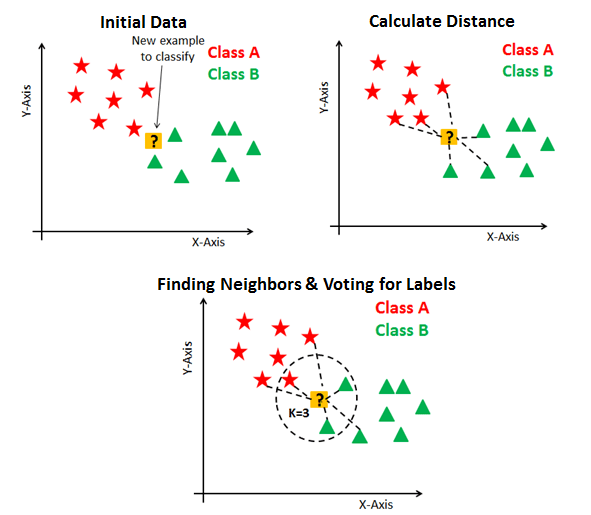)


Pros:

    Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).

Cons:

    Computationally expensive. KNN works by storing the whole training dataset in memory.
    K-NN is quite sensitive to outliers in the data (unlike SVM)


5- Imputation Using Deep Learning (Datawig):
This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

In [ ]:
import datawig

df_train, df_test = datawig.utils.random_split(train)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['1','2','3','4','5','6','7', 'target'], # column(s) containing information about the column we want to impute
    output_column= '0', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2020-08-21 18:45:50,690 [INFO]  
========== start: fit model
2020-08-21 18:45:50,691 [WARNING]  Already bound, ignoring bind()
2020-08-21 18:45:51,321 [INFO]  Epoch[0] Batch [0-465]	Speed: 12112.63 samples/sec	cross-entropy=9.262596	0-accuracy=0.000000
2020-08-21 18:45:51,893 [INFO]  Epoch[0] Train-cross-entropy=8.884165
2020-08-21 18:45:51,894 [INFO]  Epoch[0] Train-0-accuracy=0.000000
2020-08-21 18:45:51,897 [INFO]  Epoch[0] Time cost=1.196
2020-08-21 18:45:51,904 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2020-08-21 18:45:51,944 [INFO]  Epoch[0] Validation-cross-entropy=7.476050
2020-08-21 18:45:51,946 [INFO]  Epoch[0] Validation-0-accuracy=0.000000
2020-08-21 18:45:52,528 [INFO]  Epoch[1] Batch [0-465]	Speed: 12936.44 samples/sec	cross-entropy=13.684176	0-accuracy=0.000000
2020-08-21 18:45:53,087 [INFO]  Epoch[1] Train-cross-entropy=12.796621
2020-08-21 18:45:53,088 [INFO]  Epoch[1] Train-0-accuracy=0.000000
2020-08-21 18:45:53,090 [INFO]  Epoch[1] Time cost=1.14

![](https://drive.google.com/uc?export=view&id=1LPzx73ATeWDgf_z62LZMy8gemNHlOPdi)

Pros:

    Quite accurate compared to other methods.
    It has some functions that can handle categorical data (Feature Encoder).
    It supports CPUs and GPUs.

Cons:

    Single Column imputation.
    Can be quite slow with large datasets.
    You have to specify the columns that contain information about the target column that will be imputed.

For the deep learning imputation it would be smart to explore the data and determine the features that will help us first

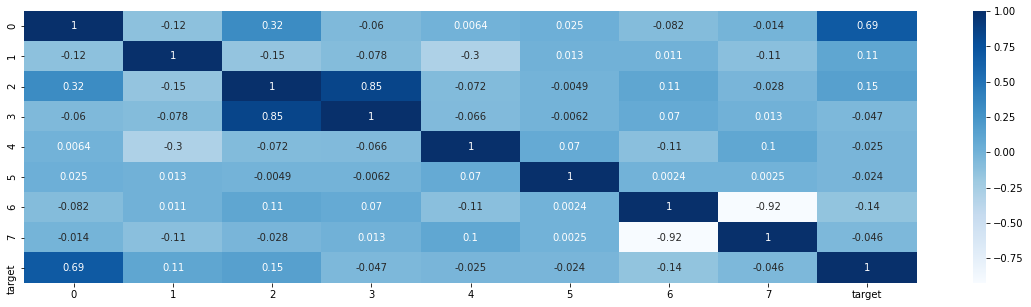

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(train.corr(), annot = True, cmap = "Blues")

In [ ]:
btrain.head()

,0,1,2,3,4,5,6,7,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,NaN,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,NaN,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
